In [1]:
import scipy as sp
from scipy.io import arff
from cStringIO import StringIO
import pandas
import numpy as np
import random
import matplotlib.pyplot as plt


#f = StringIO(content)
f="datasets/iris.arff"
data, meta = arff.loadarff(f)



In [2]:
print meta

Dataset: iris
	sepallength's type is numeric
	sepalwidth's type is numeric
	petallength's type is numeric
	petalwidth's type is numeric
	class's type is nominal, range is ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica')



In [15]:
print type(data)

<type 'numpy.ndarray'>


In [4]:
a=[]
data_num=np.zeros((150, 4))


print data_num.size

i=0
for d in data:
    data_num[i,:]=[d[0],d[1],d[2],d[3]]
    i=i+1   
#print data_num 
    
  






600


"""
Checking similarity rules
   mumerical data 
       normalize data --> (max-value)/(max-min) // (value-min)/(max-min)
       check distance by difference between values.
  
   nominal/categorical --> example: colors red,blue,green,yellow (1,2,3,4)
       compare weather equal or not. not the distance of the value assigned.
validatin methods--> we can use the ones in sklearn lybrary
"""

In [169]:
#K-means algorithm

#calculate distance to each cluster and assign point to min dist cluster
def cluster_points(X, mu):
    clusters  = {}
    for x in X:
        
        """this is what we need to modify, how to calculate distance between points"""
        #bestmukey = min([(i[0], np.linalg.norm(x-mu[i[0]])) for i in enumerate(mu)], key=lambda t:t[1])[0]
        bestmukey = min([(i[0], sp.spatial.distance.pdist([x,mu[i[0]]], 'euclidean')) for i in enumerate(mu)], key=lambda t:t[1])[0]
        
        try:
            clusters[bestmukey].append(x)
        except KeyError:
            clusters[bestmukey] = [x]
    return clusters

#reevaluate the centers of each cluster 
def reevaluate_centers(mu, clusters):
    newmu = []
    keys = sorted(clusters.keys())
    for k in keys:
        """this is what we need to modify, how to calculate center points"""
        newmu.append(np.mean(clusters[k], axis = 0))
        print "clusters shape", clusters[k].shape
    return newmu


#check convergence  by comparing of there has been no changes after recalculating the distances
def has_converged(mu, oldmu):
    
    xxx=set([tuple(a) for a in mu])
    yyy=set([tuple(a) for a in oldmu])
    return (xxx == yyy)

def cost_function(clusters,mu):
    
    cost_f=0;
    num_el=0;
    for key,c in clusters.iteritems():
        
        for x in c:
            
            cost_f=cost_f+(sp.spatial.distance.pdist([x,mu[key]], 'euclidean'))**2
            num_el=num_el+1
    

    cost_f=cost_f/num_el;
    
    return cost_f

def plot_cost_function(clusters,mu,cost_function_acc, plotg=1):
    
    

    cost_function_acc=np.append(cost_function_acc,cost_function(clusters,mu));
    
    #print "cost function at steps 0 to ",len(cost_function_acc)," ",cost_function_acc
    if plotg==1:
        plt.plot(cost_function_acc,'g')
        plt.show()
    return cost_function_acc


In [137]:
#This is the trigger of the k-means algorithm
def k_means(X,K, plot_g=1):
    
    # Initialize to K random centers
    cost_function_acc=[]
    clusters = {}
    first_run=1;
    oldmu = random.sample(X, K)
    mu = random.sample(X, K)
    #print "******** X:", X
    #print "oldmu: ",oldmu
    #print "mu: ", mu
    
    #iterate while no convergence
    while not has_converged(mu, oldmu) or first_run==1 :
        first_run = 0
        oldmu = mu
        # Assign all points in X to clusters
        clusters = cluster_points(X, mu)
        # Reevaluate centers
        mu = reevaluate_centers(oldmu, clusters)
        cost_function_acc=plot_cost_function(clusters,mu,cost_function_acc, plot_g)
    
    return(mu, clusters)

In [170]:
#K-MEANS CALL 

mu_r,clusters_r=k_means(data_num,3)



clusters shape

AttributeError: 'list' object has no attribute 'shape'

*******************************************

number of clusters:  3 

Cluster centroids values:  [array([ 6.85384615,  3.07692308,  5.71538462,  2.05384615]), array([ 5.006,  3.418,  1.464,  0.244]), array([ 5.88360656,  2.74098361,  4.38852459,  1.43442623])] 

*******************************************
Result (only showing two dimensions) 



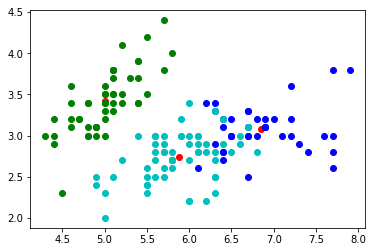

In [113]:
#RESULT PLOT
c_i=0
color_array=['bo', 'go','co', 'mo', 'yo', 'ko', 'bx','gx','cx', 'mx', 'yx', 'kx'];

for m in mu_r:
    
    plt.plot(m[0], m[1],'ro')
    #print clusters_r[c_i]
    
    for c in clusters_r[c_i]:
            plt.plot(c[0], c[1],color_array[c_i])

    c_i = c_i + 1
    
print "*******************************************\n"
print "number of clusters: ", c_i,"\n"
print "Cluster centroids values: ", mu_r,"\n"
print "*******************************************"
print "Result (only showing two dimensions)","\n"
plt.show()

In [114]:
clusters_r
results_c1= np.empty([len(clusters_r[0]),len(clusters_r[0][0])])
i=0

for c_x in clusters_r[0] :
    results_c1[i]=c_x
    i = i+1

results_c2= np.empty([len(clusters_r[1]),len(clusters_r[1][0])])

i=0

for c_x in clusters_r[1] :
    results_c2[i]=c_x
    i = i+1

results_c3= np.empty([len(clusters_r[2]),len(clusters_r[2][0])])
i=0

for c_x in clusters_r[2] :
    results_c3[i]=c_x
    i = i+1
    
results_sumary(results_c1, results_c2, results_c3)

There are 50 entries classified as Setosa in Iris data file
There are 50 entries classified as Versicolor in Iris data file.
There are 50 entries classified as Virgini in Iris data file.
39 entries were classified in one cluster of which:
Intersection of C1 with Iris setosa  0
Intersection of C1 with Iris versicolor  3
Intersection of C1  with Iris virgini  36
************************************* 
50 entries were classified in one cluster of which:
intersection with Iris setosa  48
intersection with Iris versicolor  0
intersection with Iris virgini  0
************************************* 
61 entries were classified in one cluster of which:
intersection with Iris setosa  0
intersection with Iris versicolor  47
intersection with Iris virgini  13


In [9]:
def calculate_similarity(clusters, mus):
    i=0
    simil=[]
    #print "mus in similarity function", mus
    #print "clusters in similarity function", clusters
    
    for key, value in mus.iteritems():
        print "similarity interation: key", key
        #print "similarity: el value", value
        simil.append(max([key, sp.spatial.distance.pdist([x,value], 'euclidean')] for x in clusters[key]))
        #print "similarity: partial result", simil[-1]
    
    #print "similarity lenght: ", len(simil)
    return simil

#select_split_cluster based on defined criteria : larger, heterogenia

def select_split_cluster(clustersBK, criteria):
    
    selected_key_c=0
    number_of_x=0
    
    if criteria == "larger":
        
        for key,c in clustersBK.iteritems():
            if len(c) > number_of_x:
                
                selected_key_c=key
                number_of_x=len(c)

    return selected_key_c,clustersBK[selected_key_c]


#reevaluate the centers 2 of each cluster 
def reevaluate_centers2(mu, clusters):
    newmu = {}
    keys = sorted(clusters.keys())
    for k in keys:
        """this is what we need to modify, how to calculate center points"""
        newmu[k]=np.mean(clusters[k], axis = 0)
    return newmu

In [151]:
#BKmeans
def Bk_means(X, K, k_means_iter=3):
    
    # Initialize one cluster with all data
    clustersBK={}
    clustersBK[0]=X
    
    #dummy value
    muBK={0:X[0]}
    
    muBK=reevaluate_centers2(muBK,clustersBK)
    
    #print muBK
    
    #set initial number of cluster to 1 and iterate until number of clusters=K

    for k in range(1,K):
        #print "*********** NEW ITERATION ************* ",k
        #larger_cluster=max( [c[0], len()] for c in enumerate(clustersBK)) 
        similarity=[]
        potential_new_clusters={}
        potential_new_mus={}
        
        n=0;
        c_index=0;
        #print "torna la iteracio", clustersBK.keys()
        #print "torna la iteracio", muBK.keys()
        
        
        #print "*********select cluster to split"
        
        key_c,values_c = select_split_cluster(clustersBK,"larger") #options: larger, heterogeny, 
        

        
        for i in range(0,k_means_iter):                      #if >1 then we select best k_means split with similarity 
            potential_new_mus[i],potential_new_clusters[i] = k_means(values_c, 2,0)
            similarity.append(cost_function(potential_new_clusters[i],potential_new_mus[i]))
        
        #check similarity and decide. the lowest value of similarity the more similar
        selected_division=similarity.index(min(similarity))
        
        mu=potential_new_mus[selected_division]
        clusters_add=potential_new_clusters[selected_division]

        
        #replace previous cluster
        clustersBK[key_c]=clusters_add[0]
        muBK[key_c]=mu[0]

        #print type(clustersBK)
        #print len(clustersBK)
        #add new cluster
        clustersBK[k]=clusters_add[1]
        muBK[k]=mu[1]
        #print "despres del kmeans", muBK.keys()

        
    return(muBK, clustersBK)



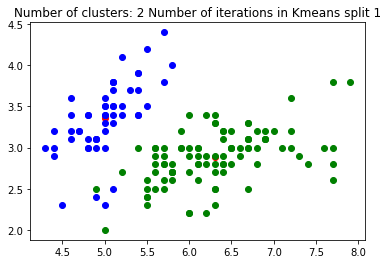

Global similarity:  [ 1.01579138]


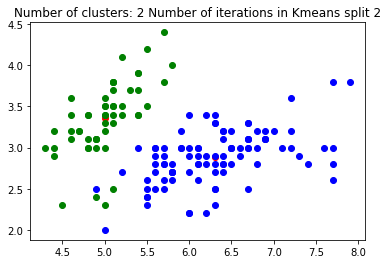

Global similarity:  [ 1.01579138]


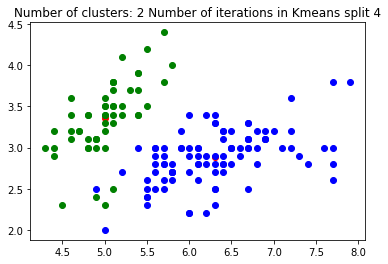

Global similarity:  [ 1.01579138]


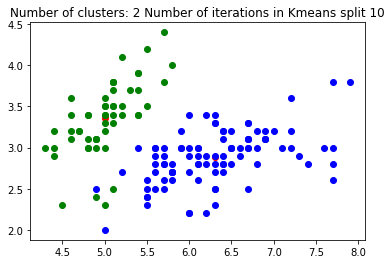

Global similarity:  [ 1.01579138]


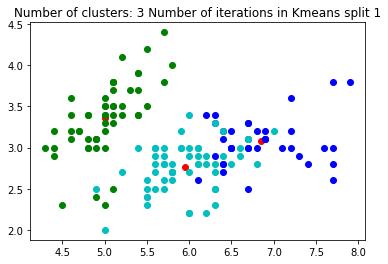

Global similarity:  [ 0.56149672]


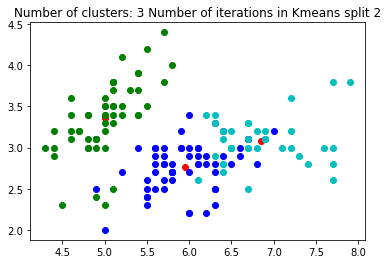

Global similarity:  [ 0.56149672]


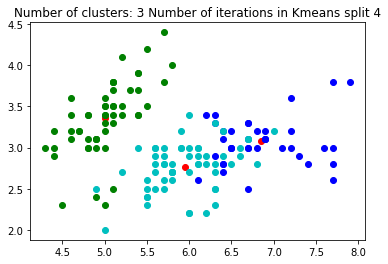

Global similarity:  [ 0.56149672]


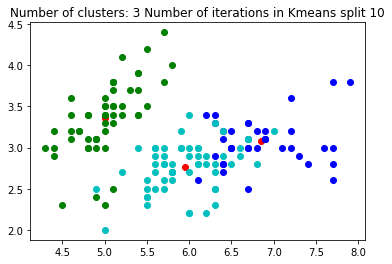

Global similarity:  [ 0.56149672]


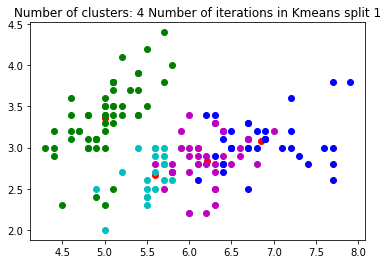

Global similarity:  [ 0.46413457]


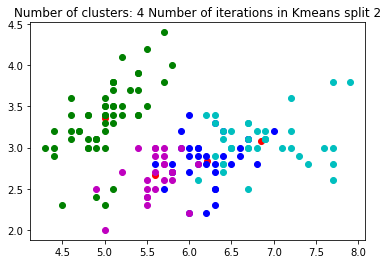

Global similarity:  [ 0.46413457]


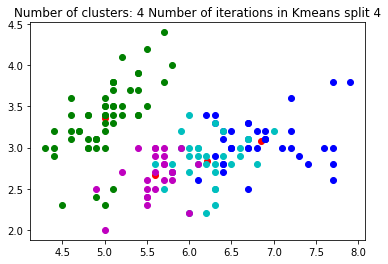

Global similarity:  [ 0.46413457]


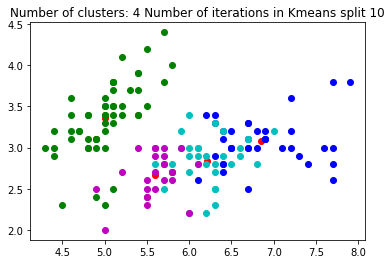

Global similarity:  [ 0.46413457]


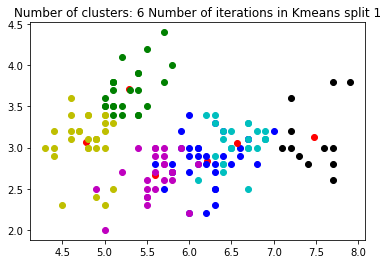

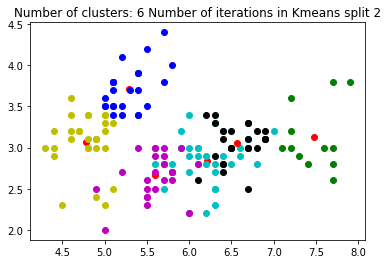

Global similarity:  [ 0.32227674]


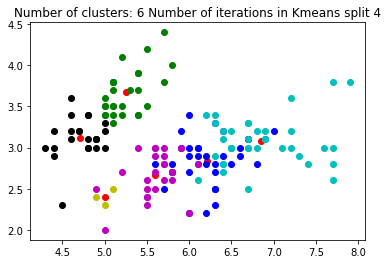

Global similarity:  [ 0.32526536]


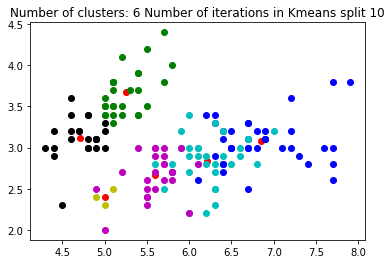

Global similarity:  [ 0.32526536]


In [166]:
##Bisectic Kmeans results for diferent values of K and iterations on the Kmeans split

plt.figure()
mu_Bk_r,clusters_Bk_r=Bk_means(data_num,2,1)
plt.title("Number of clusters: 2 Number of iterations in Kmeans split 1" )
plot_BKmeans_result(mu_Bk_r,clusters_Bk_r)
print "Global similarity: ", cost_function(clusters_Bk_r,mu_Bk_r)

plt.figure()
mu_Bk_r,clusters_Bk_r=Bk_means(data_num,2,2)
plt.title("Number of clusters: 2 Number of iterations in Kmeans split 2" )
plot_BKmeans_result(mu_Bk_r,clusters_Bk_r)
print "Global similarity: ", cost_function(clusters_Bk_r,mu_Bk_r)


plt.figure()
mu_Bk_r,clusters_Bk_r=Bk_means(data_num,2,4)
plt.title("Number of clusters: 2 Number of iterations in Kmeans split 4" )
plot_BKmeans_result(mu_Bk_r,clusters_Bk_r)
print "Global similarity: ", cost_function(clusters_Bk_r,mu_Bk_r)


plt.figure()
mu_Bk_r,clusters_Bk_r=Bk_means(data_num,2,10)
plt.title("Number of clusters: 2 Number of iterations in Kmeans split 10" )
plot_BKmeans_result(mu_Bk_r,clusters_Bk_r)
print "Global similarity: ", cost_function(clusters_Bk_r,mu_Bk_r)


plt.figure()
mu_Bk_r,clusters_Bk_r=Bk_means(data_num,3,1)
plt.title("Number of clusters: 3 Number of iterations in Kmeans split 1" )
plot_BKmeans_result(mu_Bk_r,clusters_Bk_r)
print "Global similarity: ", cost_function(clusters_Bk_r,mu_Bk_r)

plt.figure()
mu_Bk_r,clusters_Bk_r=Bk_means(data_num,3,2)
plt.title("Number of clusters: 3 Number of iterations in Kmeans split 2" )
plot_BKmeans_result(mu_Bk_r,clusters_Bk_r)
print "Global similarity: ", cost_function(clusters_Bk_r,mu_Bk_r)

plt.figure()
mu_Bk_r,clusters_Bk_r=Bk_means(data_num,3,4)
plt.title("Number of clusters: 3 Number of iterations in Kmeans split 4" )
plot_BKmeans_result(mu_Bk_r,clusters_Bk_r)
print "Global similarity: ", cost_function(clusters_Bk_r,mu_Bk_r)

plt.figure()
mu_Bk_r,clusters_Bk_r=Bk_means(data_num,3,10)
plt.title("Number of clusters: 3 Number of iterations in Kmeans split 10" )
plot_BKmeans_result(mu_Bk_r,clusters_Bk_r)
print "Global similarity: ", cost_function(clusters_Bk_r,mu_Bk_r)



plt.figure()
mu_Bk_r,clusters_Bk_r=Bk_means(data_num,4,1)
plt.title("Number of clusters: 4 Number of iterations in Kmeans split 1" )
plot_BKmeans_result(mu_Bk_r,clusters_Bk_r)
print "Global similarity: ", cost_function(clusters_Bk_r,mu_Bk_r)

plt.figure()
mu_Bk_r,clusters_Bk_r=Bk_means(data_num,4,2)
plt.title("Number of clusters: 4 Number of iterations in Kmeans split 2" )
plot_BKmeans_result(mu_Bk_r,clusters_Bk_r)
print "Global similarity: ", cost_function(clusters_Bk_r,mu_Bk_r)

plt.figure()
mu_Bk_r,clusters_Bk_r=Bk_means(data_num,4,4)
plt.title("Number of clusters: 4 Number of iterations in Kmeans split 4" )
plot_BKmeans_result(mu_Bk_r,clusters_Bk_r)
print "Global similarity: ", cost_function(clusters_Bk_r,mu_Bk_r)

plt.figure()
mu_Bk_r,clusters_Bk_r=Bk_means(data_num,4,10)
plt.title("Number of clusters: 4 Number of iterations in Kmeans split 10" )
plot_BKmeans_result(mu_Bk_r,clusters_Bk_r)
print "Global similarity: ", cost_function(clusters_Bk_r,mu_Bk_r)

plt.figure()
mu_Bk_r,clusters_Bk_r=Bk_means(data_num,6,1)
plt.title("Number of clusters: 6 Number of iterations in Kmeans split 1" )
plot_BKmeans_result(mu_Bk_r,clusters_Bk_r)

plt.figure()
mu_Bk_r,clusters_Bk_r=Bk_means(data_num,6,2)
plt.title("Number of clusters: 6 Number of iterations in Kmeans split 2" )
plot_BKmeans_result(mu_Bk_r,clusters_Bk_r)
print "Global similarity: ", cost_function(clusters_Bk_r,mu_Bk_r)

plt.figure()
mu_Bk_r,clusters_Bk_r=Bk_means(data_num,6,4)
plt.title("Number of clusters: 6 Number of iterations in Kmeans split 4" )
plot_BKmeans_result(mu_Bk_r,clusters_Bk_r)
print "Global similarity: ", cost_function(clusters_Bk_r,mu_Bk_r)

plt.figure()
mu_Bk_r,clusters_Bk_r=Bk_means(data_num,6,10)
plt.title("Number of clusters: 6 Number of iterations in Kmeans split 10" )
plot_BKmeans_result(mu_Bk_r,clusters_Bk_r)
print "Global similarity: ", cost_function(clusters_Bk_r,mu_Bk_r)








In [156]:

color_array=['bo', 'go','co', 'mo', 'yo', 'ko', 'bx','gx','cx', 'mx', 'yx', 'kx'];


def plot_BKmeans_result(mus,clusters):
    c_i=0
    for key,values in mus.iteritems():
        plt.plot(values[0], values[1],'ro')



        for c_x in clusters[c_i] :
                #print "element in cluster ", key ,":",c
                #print color_array[c_i]
                #print c[0]
                #print c[1]
                plt.plot(c_x[0], c_x[1],color_array[c_i])

        c_i = c_i + 1
    


    #print "Number of clusters:", c_i   
    plt.show()
    

In [106]:
#check results

d_Iris_setosa=data_num[np.where(data["class"]=="Iris-setosa")]
d_Iris_versicolor=data_num[np.where(data["class"]=="Iris-versicolor")]
d_Iris_virginica=data_num[np.where(data["class"]=="Iris-virginica")]

results_c1= np.empty([len(clusters_Bk_r[0]),len(clusters_Bk_r[0][0])])
i=0

for c_x in clusters_Bk_r[0] :
    results_c1[i]=c_x
    i = i+1

results_c2= np.empty([len(clusters_Bk_r[1]),len(clusters_Bk_r[1][0])])

i=0

for c_x in clusters_Bk_r[1] :
    results_c2[i]=c_x
    i = i+1

results_c3= np.empty([len(clusters_Bk_r[2]),len(clusters_Bk_r[2][0])])
i=0

for c_x in clusters_Bk_r[2] :
    results_c3[i]=c_x
    i = i+1
    

results_sumary(results_c1, results_c2, results_c3)


There are 50 entries classified as Setosa in Iris data file
There are 50 entries classified as Versicolor in Iris data file.
There are 50 entries classified as Virgini in Iris data file.
53 entries were classified in one cluster of which:
Intersection of C1 with Iris setosa  48
Intersection of C1 with Iris versicolor  3
Intersection of C1  with Iris virgini  0
************************************* 
38 entries were classified in one cluster of which:
intersection with Iris setosa  0
intersection with Iris versicolor  2
intersection with Iris virgini  36
************************************* 
59 entries were classified in one cluster of which:
intersection with Iris setosa  0
intersection with Iris versicolor  45
intersection with Iris virgini  13


In [105]:

def results_sumary(results_c1, results_c2, results_c3):

    print "There are", len(d_Iris_setosa) ,"entries classified as Setosa in Iris data file"
    print "There are", len(d_Iris_versicolor) ,"entries classified as Versicolor in Iris data file."
    print "There are", len(d_Iris_virginica) ,"entries classified as Virgini in Iris data file."

    print len(results_c1), "entries were classified in one cluster of which:"
    sett=set(map(tuple, d_Iris_setosa)).intersection(map(tuple, results_c1))
    d=len(sett)
    print"Intersection of C1 with Iris setosa ",d
    sett=set(map(tuple, d_Iris_versicolor)).intersection(map(tuple, results_c1))
    d=len(sett)
    print "Intersection of C1 with Iris versicolor ",d
    sett=set(map(tuple, d_Iris_virginica)).intersection(map(tuple, results_c1))
    d=len(sett)
    print "Intersection of C1  with Iris virgini ",d

    print "************************************* "

    print len(results_c2), "entries were classified in one cluster of which:"
    sett=set(map(tuple, d_Iris_setosa)).intersection(map(tuple, results_c2))
    d=len(sett)
    print "intersection with Iris setosa ",d
    sett=set(map(tuple, d_Iris_versicolor)).intersection(map(tuple, results_c2))
    d=len(sett)
    print "intersection with Iris versicolor ",d
    sett=set(map(tuple, d_Iris_virginica)).intersection(map(tuple, results_c2))
    d=len(sett)
    print "intersection with Iris virgini ",d

    print "************************************* "

    print len(results_c3), "entries were classified in one cluster of which:"
    sett=set(map(tuple, d_Iris_setosa)).intersection(map(tuple, results_c3))
    d=len(sett)
    print "intersection with Iris setosa ",d
    sett=set(map(tuple, d_Iris_versicolor)).intersection(map(tuple, results_c3))
    d=len(sett)
    print "intersection with Iris versicolor ",d
    sett=set(map(tuple, d_Iris_virginica)).intersection(map(tuple, results_c3))
    d=len(sett)
    print "intersection with Iris virgini ",d



In [125]:
from sklearn.cluster import KMeans


kmeans = KMeans(3, 'random', 1).fit_predict(data_num)

print kmeans

print data_num[:, 0]

plt.figure()
plt.subplot(221)
plt.scatter(data_num[:, 0], data_num[:, 1], c=kmeans)
plt.title("Incorrect Number of Blobs")



[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 1]
[ 5.1  4.9  4.7  4.6  5.   5.4  4.6  5.   4.4  4.9  5.4  4.8  4.8  4.3  5.8
  5.7  5.4  5.1  5.7  5.1  5.4  5.1  4.6  5.1  4.8  5.   5.   5.2  5.2  4.7
  4.8  5.4  5.2  5.5  4.9  5.   5.5  4.9  4.4  5.1  5.   4.5  4.4  5.   5.1
  4.8  5.1  4.6  5.3  5.   7.   6.4  6.9  5.5  6.5  5.7  6.3  4.9  6.6  5.2
  5.   5.9  6.   6.1  5.6  6.7  5.6  5.8  6.2  5.6  5.9  6.1  6.3  6.1  6.4
  6.6  6.8  6.7  6.   5.7  5.5  5.5  5.8  6.   5.4  6.   6.7  6.3  5.6  5.5
  5.5  6.1  5.8  5.   5.6  5.7  5.7  6.2  5.1  5.7  6.3  5.8  7.1  6.3  6.5
  7.6  4.9  7.3  6.7  7.2  6.5  6.4  6.8  5.7  5.8  6.4  6.5  7.7  7.7  6.
  6.9  5.6  7.7  6.3  6.7  7.2  6.2  6.1  6.4  7.2  7.4  7.9  6.4  6.3  6.1
  7.7  6.3 

Automatically created module for IPython interactive environment


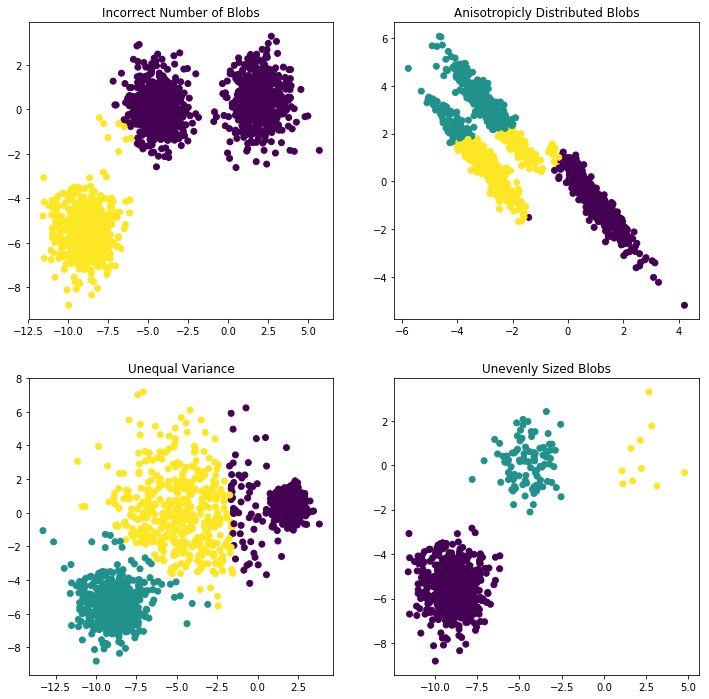

In [161]:
print(__doc__)

# Author: Phil Roth <mr.phil.roth@gmail.com>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()